# Week 5 - Practice (The Titanic)

* https://www.quora.com/What-kind-of-statistics-should-be-learned-to-make-a-good-data-analyst
* https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1
* https://www.encyclopedia-titanica.org/
* https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html

In [1]:
# the dataset is from https://data.world/datasets/titanic-dataset
import pandas as pd

titanic = pd.read_csv('titanic_watson.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [2]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                titanic.drop(['survived'], axis=1), 
                                titanic['survived'], 
                                test_size=0.25, 
                                random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(982, 13)
(328, 13)
     pclass                             name   sex   age  sibsp  parch  \
535     2.0      Phillips, Mr. Escott Robert  male  43.0    0.0    1.0   
888     3.0       Johanson, Mr. Jakob Alfred  male  34.0    0.0    0.0   
977     3.0  Lovell, Mr. John Hall ("Henry")  male  20.5    0.0    0.0   
290     1.0                Taussig, Mr. Emil  male  52.0    1.0    1.0   
285     1.0               Straus, Mr. Isidor  male  67.0    1.0    0.0   

          ticket      fare    cabin embarked boat   body          home.dest  
535  S.O./P.P. 2   21.0000      NaN        S  NaN    NaN  Ilfracombe, Devon  
888      3101264    6.4958      NaN        S  NaN  143.0                NaN  
977    A/5 21173    7.2500      NaN        S  NaN    NaN                NaN  
290       110413   79.6500      E67        S  NaN    NaN       New York, NY  
285     PC 17483  221.7792  C55 C57        S  NaN   96.0       New York, NY  


## Preprocessing

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 535 to 1126
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     981 non-null    float64
 1   name       981 non-null    object 
 2   sex        981 non-null    object 
 3   age        785 non-null    float64
 4   sibsp      981 non-null    float64
 5   parch      981 non-null    float64
 6   ticket     981 non-null    object 
 7   fare       980 non-null    float64
 8   cabin      218 non-null    object 
 9   embarked   980 non-null    object 
 10  boat       353 non-null    object 
 11  body       93 non-null     float64
 12  home.dest  545 non-null    object 
dtypes: float64(6), object(7)
memory usage: 107.4+ KB


In [4]:
X_train.isnull().sum()

pclass         1
name           1
sex            1
age          197
sibsp          1
parch          1
ticket         1
fare           2
cabin        764
embarked       2
boat         629
body         889
home.dest    437
dtype: int64

In [5]:
# find index of blank row
X_train.index[X_train.isnull().all(1)]

Int64Index([1309], dtype='int64')

In [6]:
X_train.loc[1309]

pclass       NaN
name         NaN
sex          NaN
age          NaN
sibsp        NaN
parch        NaN
ticket       NaN
fare         NaN
cabin        NaN
embarked     NaN
boat         NaN
body         NaN
home.dest    NaN
Name: 1309, dtype: object

In [7]:
# delete row by index
X_train.drop(index=1309, inplace=True)
y_train.drop(index=1309, inplace=True)

In [8]:
# observation for missling fare
X_train[X_train.fare.isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN


In [9]:
# average 3rd class fare
X_train[X_train.pclass==3.0].fare.mean()

13.041881296296305

In [10]:
# impute missing fare
X_train.fare.fillna(13, inplace=True)

In [11]:
# observation for missing embarked
X_train[X_train.embarked.isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
284,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [12]:
titanic[titanic['name'].str.contains('Stone', na=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
275,1.0,1.0,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1.0,1.0,16966,134.5,E34,C,3,NaN,"Tuxedo Park, NY"
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [13]:
titanic[titanic['cabin'] == 'B28']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [14]:
# https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
X_train.embarked.fillna('S', inplace=True)

In [15]:
# recheck null count
X_train.isnull().sum()

pclass         0
name           0
sex            0
age          196
sibsp          0
parch          0
ticket         0
fare           0
cabin        763
embarked       0
boat         628
body         888
home.dest    436
dtype: int64

In [16]:
# observation for missing embarked
X_test[X_test.embarked.isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN


In [17]:
X_test.embarked.fillna('S', inplace=True)

In [18]:
# feature with only one value

constant_features = [
    feat for feat in X_train.columns if len(X_train[feat].unique()) == 1
]

constant_features

[]

In [19]:
# check of duplications
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    orig = X_train.columns[i]

    for dupe in X_train.columns[i + 1:]:
        if X_train[orig].equals(X_train[dupe]):
            duplicated_feat.append(dupe)
            
duplicated_feat

[]

In [20]:
# quasi constant values
for feat in X_train.columns.sort_values():
    if (len(X_train[feat].unique()) < 3):
        print(X_train[feat].value_counts())

male      632
female    349
Name: sex, dtype: int64


In [21]:
X_train.isnull().sum()

pclass         0
name           0
sex            0
age          196
sibsp          0
parch          0
ticket         0
fare           0
cabin        763
embarked       0
boat         628
body         888
home.dest    436
dtype: int64

In [22]:
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Mr\.')].shape)
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Dr\.')].shape)
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Ms\.')].shape)
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Mrs\.')].shape)
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Miss\.')].shape)
print(X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Master')].shape)

(131, 13)
(1, 13)
(1, 13)
(22, 13)
(35, 13)
(6, 13)


In [23]:
X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Dr\.')] # 46

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
40,1.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA"


In [24]:
X_train.at[40, 'age'] = 46

In [25]:
X_train[(pd.isna(X_train['age'])) & X_train['name'].str.contains('Ms\.')] # 21

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1076,3.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.75,NaN,Q,NaN,NaN,NaN


In [26]:
X_train.at[1076, 'age'] = 21

In [27]:
cond1 = X_train['name'].str.contains('Master')
X_train.loc[cond1,'age'] = X_train.loc[cond1,'age'].fillna(X_train.loc[cond1,'age'].mean())

cond2 = X_train['name'].str.contains('Miss\.')
X_train.loc[cond2,'age'] = X_train.loc[cond2,'age'].fillna(X_train.loc[cond2,'age'].mean())

cond3 = X_train['name'].str.contains('Mrs\.')
X_train.loc[cond3,'age'] = X_train.loc[cond3,'age'].fillna(X_train.loc[cond3,'age'].mean())

cond4 = X_train['name'].str.contains('Mr\.')
X_train.loc[cond4,'age'] = X_train.loc[cond4,'age'].fillna(X_train.loc[cond4,'age'].mean())

In [28]:
X_train.isnull().sum()

pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        763
embarked       0
boat         628
body         888
home.dest    436
dtype: int64

In [29]:
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Mr\.')].shape)
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Dr\.')].shape)
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Ms\.')].shape)
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Mrs\.')].shape)
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Miss\.')].shape)
print(X_test[(pd.isna(X_test['age'])) & X_test['name'].str.contains('Master')].shape)

(45, 13)
(0, 13)
(0, 13)
(5, 13)
(15, 13)
(2, 13)


In [30]:
cond1 = X_test['name'].str.contains('Master')
X_test.loc[cond1,'age'] = X_test.loc[cond1,'age'].fillna(X_test.loc[cond1,'age'].mean())

cond2 = X_test['name'].str.contains('Miss\.')
X_test.loc[cond2,'age'] = X_test.loc[cond2,'age'].fillna(X_test.loc[cond2,'age'].mean())

cond3 = X_test['name'].str.contains('Mrs\.')
X_test.loc[cond3,'age'] = X_test.loc[cond3,'age'].fillna(X_test.loc[cond3,'age'].mean())

cond4 = X_test['name'].str.contains('Mr\.')
X_test.loc[cond4,'age'] = X_test.loc[cond4,'age'].fillna(X_test.loc[cond4,'age'].mean())

In [31]:
# create adult male feature
import pandas as pd

def is_adult_male(row):
    if pd.isna(row['age']):
        return None
    if row['age'] > 15 and row['age'] < 81 and row['sex'] == 'male':
        return 1
    else:
        return 0
    
X_train['adult_male'] = X_train.apply(is_adult_male, axis=1)
X_test['adult_male'] = X_test.apply(is_adult_male, axis=1)
X_train['adult_male'].value_counts(dropna=False)

1    580
0    401
Name: adult_male, dtype: int64

In [32]:
X_test.isnull().sum()

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin         251
embarked        0
boat          195
body          300
home.dest     128
adult_male      0
dtype: int64

## Exploratory Data Analysis

In [33]:
X_train.describe()

,pclass,age,sibsp,parch,fare,body,adult_male
count,981.000000,981.000000,981.000000,981.000000,981.000000,93.000000,981.000000
mean,2.304791,29.526551,0.511723,0.360856,33.297727,166.000000,0.591233
std,0.840230,13.050545,0.999548,0.846516,52.492106,100.296517,0.491857
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,21.533235,0.000000,0.000000,7.895800,75.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,14.458300,172.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,30.000000,259.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


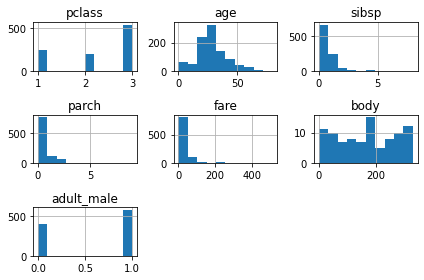

In [34]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

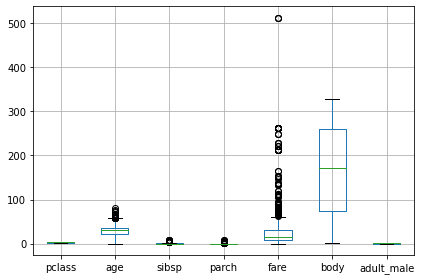

In [35]:
X_train.boxplot()
plt.tight_layout();

### Outliers

In [36]:
for feat in X_train._get_numeric_data().columns:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    if lower_count > 0 or upper_count > 0:
        print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

age outliers = 29: lower_fence: -0.0, upper_fence: 58.0, lower_count: 0, upper_count: 29
sibsp outliers = 46: lower_fence: -2.0, upper_fence: 2.0, lower_count: 0, upper_count: 46
parch outliers = 220: lower_fence: 0.0, upper_fence: 0.0, lower_count: 0, upper_count: 220
fare outliers = 130: lower_fence: -25.0, upper_fence: 63.0, lower_count: 0, upper_count: 130


## Feature Engineering

In [37]:
# mapping female male
X_train['sex'] = X_train['sex'].map({'female':0,'male':1})
X_test['sex'] = X_test['sex'].map({'female':0,'male':1})
X_train['sex'].value_counts()

1    632
0    349
Name: sex, dtype: int64

In [38]:
# reducing labels
import re

def cat_home(r):
    text = str(r['home.dest']).strip()
    if bool(re.search('[A-Z]{2}$', text[-2:])):
        return 'North America'
    elif text == 'nan':
        return 'Missing'
    else:
        return 'Not North America'

X_train['cat_home'] = X_train.apply(cat_home, axis=1)
X_test['cat_home'] = X_test.apply(cat_home, axis=1)

print(X_train['cat_home'].value_counts())
print()
print(X_test['cat_home'].value_counts())

Missing              436
North America        410
Not North America    135
Name: cat_home, dtype: int64

North America        155
Missing              128
Not North America     45
Name: cat_home, dtype: int64


In [39]:
# check info for categorical features
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 535 to 1126
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      981 non-null    float64
 1   name        981 non-null    object 
 2   sex         981 non-null    int64  
 3   age         981 non-null    float64
 4   sibsp       981 non-null    float64
 5   parch       981 non-null    float64
 6   ticket      981 non-null    object 
 7   fare        981 non-null    float64
 8   cabin       218 non-null    object 
 9   embarked    981 non-null    object 
 10  boat        353 non-null    object 
 11  body        93 non-null     float64
 12  home.dest   545 non-null    object 
 13  adult_male  981 non-null    int64  
 14  cat_home    981 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 154.9+ KB


In [40]:
# start list of features we won't use for analysis
features_to_drop = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

## More EDA

### Correlation

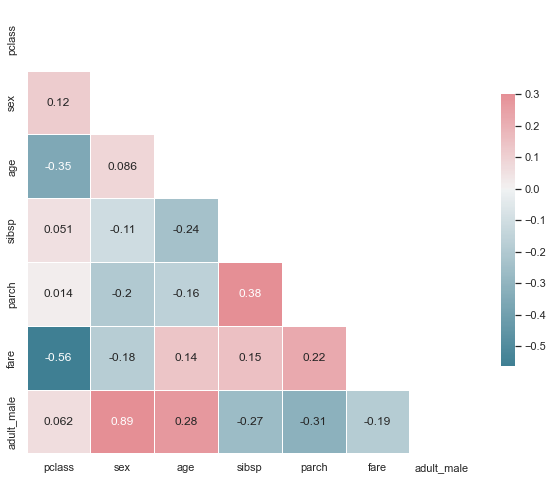

In [41]:
# feature on feature
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.drop(features_to_drop, axis=1).corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Variance Inflation Factor

* Measures how much one predictor is influenced, or inflated, by the presence, or correlation, of another predictor
* Quick measure of the contribution of a predictor to the standard error, the standard deviation of a sample, in regression

https://www.statisticshowto.com/variance-inflation-factor/

In [42]:
# vif
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_train = X_train.drop(features_to_drop, axis=1)._get_numeric_data()
vif_data = [variance_inflation_factor(vif_train.values, i) for i in range(len(vif_train.columns))]

d = {'feature': vif_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,pclass,4.503472
1,sex,16.595575
2,age,5.105797
3,sibsp,1.648798
4,parch,1.542238
5,fare,1.731370
6,adult_male,17.043264


In [43]:
# add adult_male to features to drop and possibly fare
# for a list, we use append to add one item and extend to add multiple items
features_to_drop.extend(['adult_male', 'fare'])

### Mutual Information

* Measures the mutual dependence on two variables
* Persons r is linear where as MI measures non-linear relationships
* How much information can be extracted from one variable by observing another variable

Text(0, 0.5, 'Mutual Information')

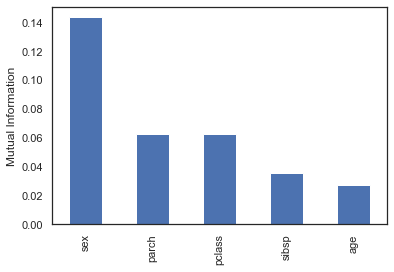

In [44]:
# obtain the mutual information values and select features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

mi_train = X_train.drop(features_to_drop, axis=1)._get_numeric_data()

mi = mutual_info_regression(mi_train, y_train)
mi = pd.Series(mi)
mi.index = mi_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information')

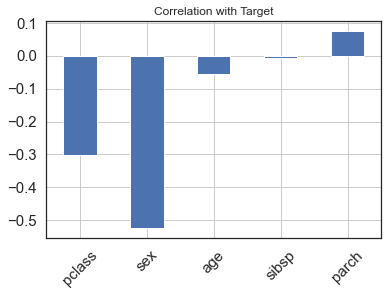

In [45]:
# correlation anlaysis against our titanic target (survived)
X_train.drop(features_to_drop, axis=1)._get_numeric_data().corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

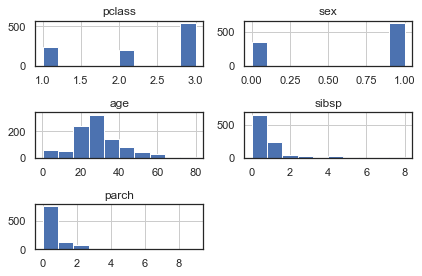

In [46]:
import matplotlib.pyplot as plt

X_train.drop(features_to_drop, axis=1)._get_numeric_data().hist()
plt.tight_layout();

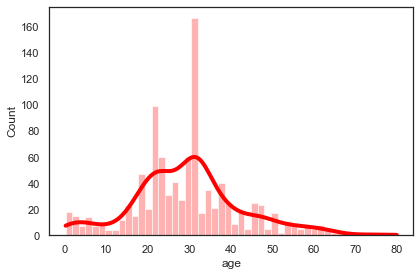

In [47]:
# example of a histogram with kde
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X_train['age'], alpha=0.3, kde=True, 
             bins=int(50), color = 'red',
             line_kws={'linewidth': 4})

plt.tight_layout()
plt.show();

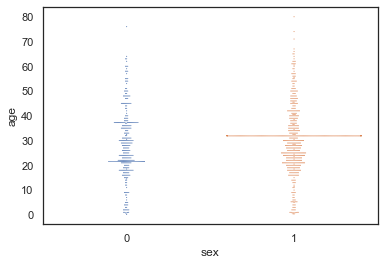

In [48]:
# an interesting way to view sex and age .map({'female':1,'male':0})
import seaborn as sns

sns.swarmplot(x='sex', y='age', data=X_train.drop(features_to_drop, axis=1)._get_numeric_data(), size=1);

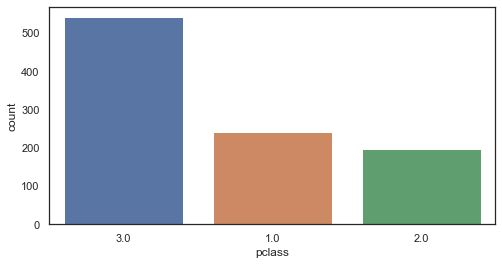

In [49]:
# look at pclass counts
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=X_train.pclass, order=X_train.pclass.value_counts().index);

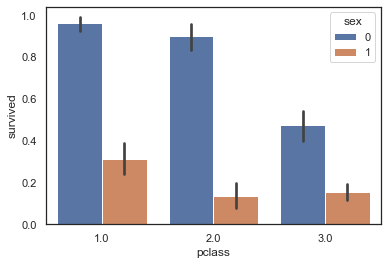

In [50]:
# bar chart with 95% confidence intervals (error bars)
sns.barplot(x='pclass', y=y_train, hue='sex', data=X_train);

<AxesSubplot:xlabel='pclass,sex'>

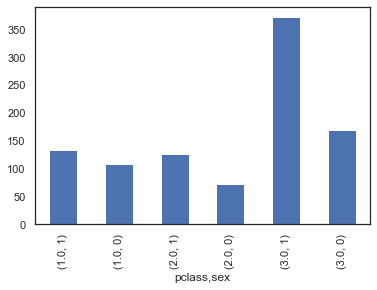

In [51]:
# example of using groupby
X_train.groupby('pclass')['sex'].value_counts().plot(kind='bar')

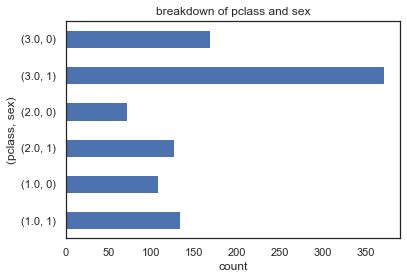

In [52]:
X_train.groupby('pclass')['sex'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('(pclass, sex)')
plt.title('breakdown of pclass and sex')
plt.show()

In [53]:
# groupby data views
titanic.groupby(['pclass', 'embarked']).size()

pclass  embarked
1.0     C           141
        Q             3
        S           177
2.0     C            28
        Q             7
        S           242
3.0     C           101
        Q           113
        S           495
dtype: int64

In [54]:
# using aggregates
titanic.groupby('sex')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
sex,,,,
female,6.75,512.3292,46.198097,23.0000
male,0.00,512.3292,26.154601,11.8875


## More Feature Engineering

* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard

### One Hot Encoding

In [55]:
X_train.drop(features_to_drop, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 535 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    float64
 1   sex       981 non-null    int64  
 2   age       981 non-null    float64
 3   sibsp     981 non-null    float64
 4   parch     981 non-null    float64
 5   embarked  981 non-null    object 
 6   cat_home  981 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 93.6+ KB


In [56]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

cat_features = ['embarked', 'cat_home']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.drop(features_to_drop, axis=1).shape)
print(X_test.drop(features_to_drop, axis=1).shape)
print(X_train.drop(features_to_drop, axis=1).info())

(981, 9)
(328, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 535 to 1126
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pclass                      981 non-null    float64
 1   sex                         981 non-null    int64  
 2   age                         981 non-null    float64
 3   sibsp                       981 non-null    float64
 4   parch                       981 non-null    float64
 5   embarked_Q                  981 non-null    float64
 6   embarked_S                  981 non-null    float64
 7   cat_home_North America      981 non-null    float64
 8   cat_home_Not North America  981 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 108.9 KB
None


## Feature Selection

* https://towardsdatascience.com/the-power-of-ridge-regression-4281852a64d6

In [57]:
# list features we targeted to drop
features_to_drop

['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'adult_male', 'fare']

In [58]:
# create new list that we can add and subtract from
drop_features = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'adult_male', 'fare']

### Variance Threshold

* Feature selector that removes all low-variance features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [59]:
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.2)
selections.fit(X_train.drop(drop_features, axis=1))
X_train.drop(drop_features, axis=1).columns.values[selections.get_support()]

array(['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S',
       'cat_home_North America'], dtype=object)

### Select K Best

* Select features according to the k highest scores
* Chi-squared stats of non-negative features for classification tasks

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selections = SelectKBest(chi2, k=6) 
selections.fit(X_train.drop(drop_features, axis=1), y_train)
X_train.drop(drop_features, axis=1).columns.values[selections.get_support()]

array(['pclass', 'sex', 'age', 'parch', 'embarked_S',
       'cat_home_North America'], dtype=object)

### Select Features Using Logistic Regression

* Meta-transformer for selecting features based on importance weights

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selections = SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(
                    X_train.drop(drop_features, axis=1), y_train)
X_train.drop(drop_features, axis=1).columns.values[selections.get_support()]

array(['pclass', 'sex', 'cat_home_North America'], dtype=object)

### Recursive Feature Selection

* Feature ranking with recursive feature elimination
* Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

selections = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5).fit(
                    X_train.drop(drop_features, axis=1), y_train)
X_train.drop(drop_features, axis=1).columns.values[selections.get_support()]

array(['pclass', 'sex', 'embarked_Q', 'embarked_S',
       'cat_home_North America'], dtype=object)

## The Model

### Check for Balanced Dataset

0.0    616
1.0    365
Name: survived, dtype: int64


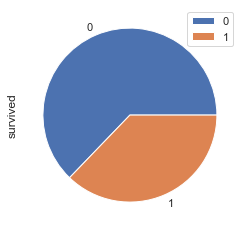

In [63]:
# see if the titanic survived (target) is balanced
print(y_train.value_counts())
y_train.value_counts().plot.pie(labels=['0', '1']).legend()

In [64]:
# we can now build our titanic regression model
# is it balanced? no, use class_weight='balanced'
# is it a small dataset? yes, use liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train.drop(drop_features, axis=1), y_train)
predictions = model.predict(X_test.drop(drop_features, axis=1))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

rocauc_score = roc_auc_score(y_test, predictions)

print(f'Training Score: {model.score(X_train.drop(drop_features, axis=1), y_train)}')
print(f'Test Score: {model.score(X_test.drop(drop_features, axis=1), y_test)}')

# what is our accuracy? (tn + tp / (total length of our data))
print(f'Test Accuracy (tn + tp / (total length of our data)): {(tn + tp) / (tn + fp + fn + tp)}')
print(f'Roc-Auc Score: {rocauc_score}')

print()
print(confusion_matrix(y_test, predictions))

Training Score: 0.7716615698267074
Test Score: 0.7957317073170732
Test Accuracy (tn + tp / (total length of our data)): 0.7957317073170732
Roc-Auc Score: 0.7885818460947994

[[160  33]
 [ 34 101]]
